In [116]:
# Reading FTS data from Elasticsearch

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from time import time
import pprint

es = Elasticsearch(['atlas-kibana.mwt2.org:9200'],timeout=60)
my_index = "rucio-events*"

## Select period you are interested in

In [118]:
start_date = '2016-07-01'
end_date   = '2016-09-22'

### here the query

In [119]:
my_query = {
 'query': { 
  'filtered': {
   'query': { "match_all": {} },
   'filter':{
    'bool': {
     'must': [
      {"exists" : { "field" : "payload.activity" }},
      {'term':{'payload.dst-rse': 'UKI-NORTHGRID-MAN-HEP_DATADISK' }},
      {'term':{'payload.src-rse': 'RRC-KI-T1_DATADISK' }},
      {'range': {'created_at': {'gte': start_date, 'lt': end_date}}}    
     ]
    }
   }
  }
 }
}

### streaming the documents

In [120]:
t0 = time()
scroll = scan(es, query=my_query, index=my_index)
pp = pprint.PrettyPrinter(indent=4)

count = 0
allSizes=[]
for res in scroll:
    if not count%1000:  print(count)
    if count<1: pp.pprint(res)
    count += 1
    if res['_source']['event_type']=='transfer-done':
        allSizes.append(res['_source']['payload']['bytes'])
    
t1 = time()

print (count, 'events in %f seconds.' %(t1-t0), count/(t1-t0), "ev/s.")

0
{   '_id': 'AVWkverfd25u_mmDIJJb',
    '_index': 'rucio-events-2016.07.01',
    '_score': 0.0,
    '_source': {   '@timestamp': '2016-07-01T04:35:56.582Z',
                   '@version': '1',
                   'created_at': '2016-07-01 04:35:49',
                   'event_type': 'transfer-done',
                   'payload': {   'activity': 'Production Input',
                                  'bytes': 358598,
                                  'checksum-adler': '11bac3b4',
                                  'checksum-md5': None,
                                  'created_at': None,
                                  'dst-rse': 'UKI-NORTHGRID-MAN-HEP_DATADISK',
                                  'dst-type': 'DISK',
                                  'dst-url': 'srm://bohr3226.tier2.hep.manchester.ac.uk:8446/srm/managerv2?SFN=/dpm/tier2.hep.manchester.ac.uk/home/atlas/atlasdatadisk/rucio/mc15_13TeV/3e/47/HITS.08797285._004641.pool.root.1',
                                  'duration': 14.

### ploting some data

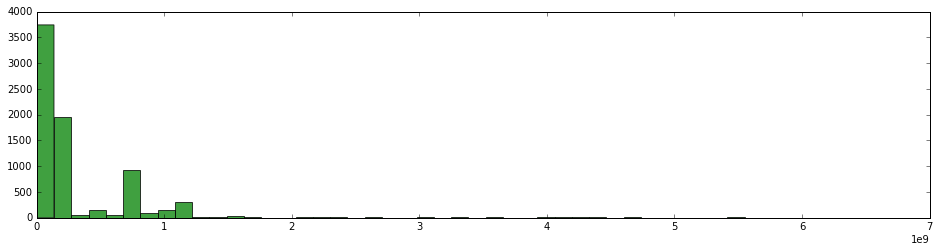

In [121]:
plt.figure(figsize=[16, 17])
gs = gridspec.GridSpec(4, 1)

ax0 = plt.subplot(gs[0])
ax0.hist(allSizes, 50, normed=0, facecolor='green', alpha=0.75)
#ax0.plot(Fthr.timestamp.tolist(), Fthr.throughput.tolist(), ls='-', marker='>', c='r', label=sS+'->'+dS)
#ax0.plot(Bthr.timestamp.tolist(), Bthr.throughput.tolist(), ls='-', marker='<', c='b', label=dS+'->'+sS)
#ax0.set_xlabel('time')
#ax0.set_ylabel('throughput [Gbps]')#,rotation='horizontal')
#ax0.xlim(xmin=0)
#ax0.legend()


#ax2 = plt.subplot(gs[1])
plt.show()